In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler # to standardize the data and to plot box plot
from sklearn.decomposition import PCA # to import PCA
from sklearn.linear_model import LogisticRegression
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics

## Principal Component Analysis

## Read the csv file

In [19]:
df=pd.read_csv('C:\\Users\\Pranusha\\Desktop\\DSE\\EDA\\datasets\\datasets\\wine.csv')

In [21]:
df.head(2)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [24]:
df.tail()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,Barbera,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,Barbera,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,Barbera,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [62]:
df.shape

(178, 15)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


## Summary Statistics of the dataset

In [37]:
df.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Preprocessing steps: 
## a) Imputation if any
## b) Outlier detection & report -- Box plot or IQR
## c) Standardization

## To check for any null values present

In [143]:
df.isnull().any()
# No missing values in this dataset

label    False
name     False
alc      False
ma       False
ash      False
ala      False
mg       False
tph      False
fl       False
nfp      False
pro      False
ci       False
hue      False
od       False
pl       False
dtype: bool

In [126]:
df.columns=(['label','name','alc','ma','ash','ala','mg','tph','fl','nfp','pro','ci','hue','od','pl'])
df.head(2)

,label,name,alc,ma,ash,ala,mg,tph,fl,nfp,pro,ci,hue,od,pl
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


## Outlier Detection using box plot and standardization

C:\Users\Pranusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pranusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


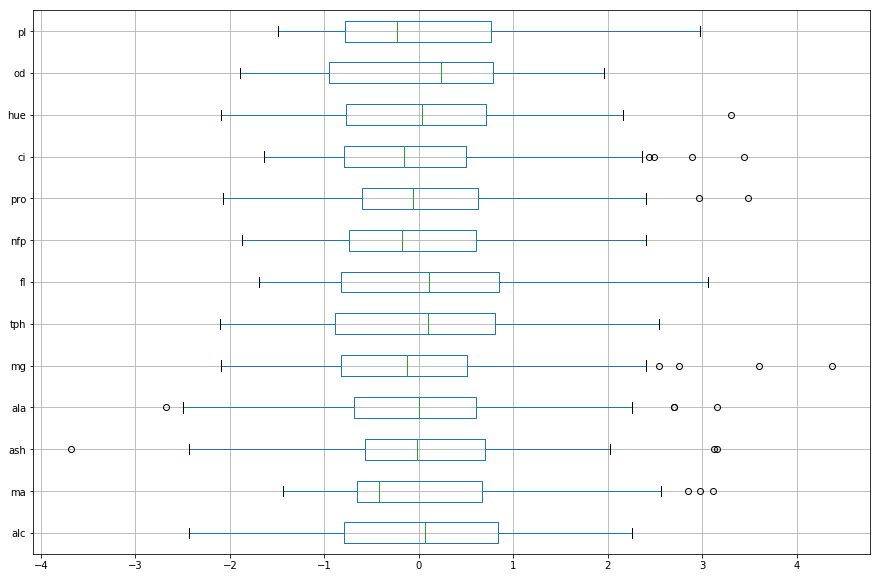

In [129]:
scaler = StandardScaler().fit(x)
x=df.drop(['name','label'],axis=1)
y=pd.DataFrame(scaler.transform(x),columns=x.columns)
y.boxplot(vert=False,figsize=(15,10))

In [130]:
y.head(2)

,alc,ma,ash,ala,mg,tph,fl,nfp,pro,ci,hue,od,pl
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


## From the above box plot, the following outliers have been detected:
## Malic acid has 3 outliers
## Ash has 3 outliers
## Magnesium has 4 outliers
## Alcalanity of ash has 3 outliers
## Proanthocyanins has 2 outliers
## Color intensity has 4 outliers
## Hue has 1 outlier

In [102]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(y)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8','comp9', 
                                      'comp10','comp11', 'comp12','comp13'])

In [103]:
finalDf = pd.concat([principalDf, df[['name']]], axis = 1)

In [104]:
finalDf.head(2)

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,name
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,Barolo
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,Barolo


In [105]:
# to calculate the variance in each of the independent column/feature
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [106]:
# to calculate the cumulative variance in each of the independent column/feature
z=pca.explained_variance_ratio_.cumsum()

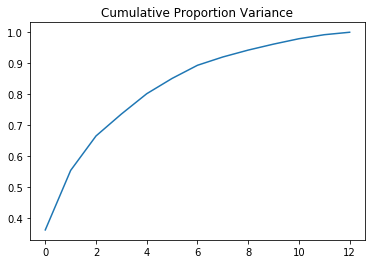

In [107]:
# plotting the 13 transformed features
plt.plot(z)
plt.title('Cumulative Proportion Variance')
plt.show()

## With the help of above elbow chart, it is showed that with 8 components 90% cumulative 
## proportion has been attained

## Model building with n=8 and with PCA

In [109]:
pca1 = PCA(n_components=8)
principalComponents = pca1.fit_transform(y)
principalDf1 = pd.DataFrame(data = principalComponents,
                           columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8'])

In [110]:
finalDf1 = pd.concat([principalDf1, df[['name']]], axis = 1)

In [111]:
finalDf1.head(2)

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,name
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.22388,0.596427,0.065139,Barolo
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.92712,0.053776,1.024416,Barolo


## Logistic Regression with PCA and n=8

In [114]:
X=principalDf1
Y=df['name']

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((142, 8), (36, 8))

In [118]:
LR1 = LogisticRegression()
LR1.fit(X_train, Y_train)
y1_predict = LR1.predict(X_test)
y1_acc = metrics.accuracy_score(Y_test,y1_predict)
print(y1_acc)
y1_cm=metrics.confusion_matrix(Y_test,y1_predict)
print(y1_cm)
y1_CR=metrics.classification_report(Y_test,y1_predict)
print(y1_CR)

0.9722222222222222
[[ 9  0  0]
 [ 0 14  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

     Barbera       1.00      1.00      1.00         9
      Barolo       0.93      1.00      0.97        14
  Grignolino       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



C:\Users\Pranusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Logistic Regression without PCA

In [131]:
a=y
b=df['name']

In [132]:
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=1)
x_train.shape, x_test.shape

((142, 13), (36, 13))

In [133]:
LR2 = LogisticRegression()
LR2.fit(x_train, y_train)
y2_predict = LR2.predict(x_test)
y2_acc = metrics.accuracy_score(y_test,y2_predict)
print(y2_acc)
y2_cm=metrics.confusion_matrix(y_test,y2_predict)
print(y2_cm)
y2_CR=metrics.classification_report(y_test,y2_predict)
print(y2_CR)

1.0
[[ 9  0  0]
 [ 0 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Barbera       1.00      1.00      1.00         9
      Barolo       1.00      1.00      1.00        14
  Grignolino       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\Pranusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Without PCA the model accuracy is 100% and since it tends to over fit, PCA is applied
## With PCA and n=8 the model accuracy is 97.2%

## Model Building with n=5 and with PCA

In [134]:
pca2 = PCA(n_components=5)
principalComponents = pca2.fit_transform(y)
principalDf2 = pd.DataFrame(data = principalComponents,
                           columns = ['comp1', 'comp2','comp3', 'comp4','comp5'])

In [137]:
finalDf2 = pd.concat([principalDf2, df[['name']]], axis = 1)

In [138]:
finalDf2.head(2)

,comp1,comp2,comp3,comp4,comp5,name
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,Barolo
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,Barolo


## Logistic Regression with PCA and n=5

In [139]:
p=principalDf2
q=df['name']

In [140]:
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=1)

In [142]:
LR3 = LogisticRegression()
LR3.fit(p_train, q_train)
y3_predict = LR3.predict(p_test)
y3_acc = metrics.accuracy_score(q_test,y3_predict)
print(y3_acc)
y3_cm=metrics.confusion_matrix(q_test,y3_predict)
print(y3_cm)
y3_CR=metrics.classification_report(q_test,y3_predict)
print(y3_CR)

1.0
[[ 9  0  0]
 [ 0 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

     Barbera       1.00      1.00      1.00         9
      Barolo       1.00      1.00      1.00        14
  Grignolino       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\Pranusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranusha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
